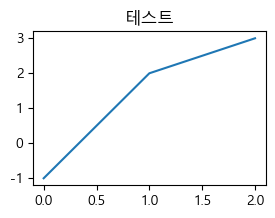

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ---------------------------------------
# 한글 폰트 설정
# ---------------------------------------

plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

pd.Series([-1,2,3]).plot(title='테스트', figsize=(3,2))

# ---------------------------------------
# 그래프 전역 크기 설정
# ---------------------------------------
plt.rc('figure', figsize=(12,5))

pass


## 문제 정의
- 산불 발생 현황
- 산불 피해 현황
- 산불 주요 원인

## 데이터 수집

- 산불 발생 및 피해 현황 데이터
    - https://kosis.kr/statHtml/statHtml.do?sso=ok&returnurl=https%3A%2F%2Fkosis.kr%3A443%2FstatHtml%2FstatHtml.do%3Fconn_path%3DMT_ZTITLE%26list_id%3DC_12%26obj_var_id%3D%26seqNo%3D%26tblId%3DTX_13601_A020%26vw_cd%3DMT_ZTITLE%26itm_id%3D%26language%3Dkor%26lang_mode%3Dko%26orgId%3D136%26

## 데이터 프레임 생성

In [2]:
# ----------------------------------------
# 데이터프레임 생성
#  - header : 헤더설정(중첩헤더 설정)
# ----------------------------------------

d1 = "data\산불데이터\계절별_산불발생_현황_20250406140813.csv"
d2 = 'data/산불데이터/산불피해_현황_20250406123339.csv'
d3 = 'data\산불데이터\시간대별_산불발생_현황_20250406142005.csv'

df1 = pd.read_csv(d1)
df2 = pd.read_csv(d2, header=[1,2])

df3 = pd.read_csv(d3, header=[0,1], encoding='cp949')

df3

시점        금년                                 
      시점 오전(6~10시) 정오(11~13시) 오후(14~18시) 야간(19~05시)
0   1997        31        193        256         44
1   1998        11         72        144         38
2   1999        14        110        150         41
3   2000        24        153        456         96
4   2001        58        287        333        107
5   2002        33        225        284         57
6   2003        13        100        144         14
7   2004        25        221        236         62
8   2005        28        174        275         39
9   2006        22        139        187         57
10  2007        23        129        209         57
11  2008        25        142        182         40
12  2009        49        197        252         72
13  2010        21        103        126         32
14  2011         9        106        138         24
15  2012        16         56         98         27
16  2013        16        106        140         34
17  2014        43        147        250         52
18  2015        60        191        302         70
19  2016        22        148        180         41
20  2017        56        231        338         67
21  2018        48        168        233         47
22  2019        60        227        272         94
23  2020        43        233        264         80
24  2021        32        115        150         52
25  2022        75        238        316        127
26  2023        54        221        248         73
27  2024        30        115        108         26

In [3]:
# ----------------------------------------
# 인덱스라벨 설정
#  - 시점
# ----------------------------------------
df1.set_index('시점', inplace=True)
df2.set_index(('시점', '시점'), inplace=True)
df3.set_index(('시점', '시점'), inplace=True)

In [4]:
df3.columns

MultiIndex([('금년',  '오전(6~10시)'),
            ('금년', '정오(11~13시)'),
            ('금년', '오후(14~18시)'),
            ('금년', '야간(19~05시)')],
           )

In [5]:
# ----------------------------------------
# 데이터프레임 확인
#   - head()
# ----------------------------------------

display(df1.head(5))
display(df2.head(5))
display(df3.head(5))

,기간별,합계,봄(3~5월),여름(6~8월),가을(9~11월),겨울(12~2월)
시점,,,,,,
1997,금년,524,310,7,79,128
1998,금년,265,171,1,14,79
1999,금년,315,197,5,14,99
2000,금년,729,503,17,30,179
2001,금년,785,625,28,56,76


원인 (건)                                                         산불피해  \
             합계 입산자실화 규반소각 논밭두렁소각 쓰레기소각 담뱃불실화 성묘객실화 어린이불장난 건축물화재   기타 건수 (건)   
(시점, 시점)                                                                       
1995        630   312    -    138     -     -    34     18     -  128    630   
1996        527   248    -     73     -     -    38     30     -  138    527   
1997        524   247    -    103    41    29    33     10     -   61    524   
1998        265   104    -     65    24    13    16     11     -   32    265   
1999        315   156    -     57    13    21    20     10     -   38    315   

                                    인명피해 (명)         
          면적 (ha)  재적 (㎥)  피해액 (천원)       합계  사망 부상  
(시점, 시점)                                             
1995      1013.27    5452    450678       26  25  1  
1996      5367.63  363471  13321974       26  24  2  
1997      2329.79   40815   1628712       30  24  6  
1998      1014.00   44092   2516219       16  15  1  
1999       472.79    6377    665661        5   5  -

금년                                 
         오전(6~10시) 정오(11~13시) 오후(14~18시) 야간(19~05시)
(시점, 시점)                                           
1997            31        193        256         44
1998            11         72        144         38
1999            14        110        150         41
2000            24        153        456         96
2001            58        287        333        107

In [6]:
# ----------------------------------------
# 데이터프레임 확인
#   - tail()
# ----------------------------------------

df1.tail()
df2.tail()
df3.tail()

금년                                 
         오전(6~10시) 정오(11~13시) 오후(14~18시) 야간(19~05시)
(시점, 시점)                                           
2020            43        233        264         80
2021            32        115        150         52
2022            75        238        316        127
2023            54        221        248         73
2024            30        115        108         26

In [7]:
# ----------------------------------------
# 데이터프레임 확인
#   - info()
# ----------------------------------------
display(df1.info())
display(df2.info())
display(df3.info())

<class 'pandas.core.frame.DataFrame'>
Index: 28 entries, 1997 to 2024
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   기간별        28 non-null     object
 1   합계         28 non-null     int64 
 2   봄(3~5월)    28 non-null     int64 
 3   여름(6~8월)   28 non-null     int64 
 4   가을(9~11월)  28 non-null     int64 
 5   겨울(12~2월)  28 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 1.5+ KB


None

<class 'pandas.core.frame.DataFrame'>
Index: 30 entries, 1995 to 2024
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   (원인 (건), 합계)      30 non-null     int64  
 1   (원인 (건), 입산자실화)   30 non-null     int64  
 2   (원인 (건), 규반소각)    30 non-null     object 
 3   (원인 (건), 논밭두렁소각)  30 non-null     int64  
 4   (원인 (건), 쓰레기소각)   30 non-null     object 
 5   (원인 (건), 담뱃불실화)   30 non-null     object 
 6   (원인 (건), 성묘객실화)   30 non-null     int64  
 7   (원인 (건), 어린이불장난)  30 non-null     object 
 8   (원인 (건), 건축물화재)   30 non-null     object 
 9   (원인 (건), 기타)      30 non-null     int64  
 10  (산불피해, 건수 (건))    30 non-null     object 
 11  (산불피해, 면적 (ha))   30 non-null     float64
 12  (산불피해, 재적 (㎥))    30 non-null     int64  
 13  (산불피해, 피해액 (천원))  30 non-null     int64  
 14  (인명피해 (명), 합계)    30 non-null     int64  
 15  (인명피해 (명), 사망)    30 non-null     object 
 16  (인명피해 (명), 부상)    30 non-null     object 
dtyp

None

<class 'pandas.core.frame.DataFrame'>
Index: 28 entries, 1997 to 2024
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   (금년, 오전(6~10시))   28 non-null     int64
 1   (금년, 정오(11~13시))  28 non-null     int64
 2   (금년, 오후(14~18시))  28 non-null     int64
 3   (금년, 야간(19~05시))  28 non-null     int64
dtypes: int64(4)
memory usage: 1.1 KB


None

## 자료형 변환
- 모든 데이터가 숫자형이어야 함
- 데이터타입이 문자열인 컬럼을 모두 찾아서 숫자형으로 변환
- `데이터프레임.select_dtypes(include=자료형)`
    - 특정 자료형을 가진 컬럼 선택
- str 접근자
    - 문자열 컬럼 전처리
    - `컬럼.str.문자열처리함수()`
    - `컬럼.str[인덱싱]`


In [8]:
# ----------------------------------------
#  type이 object인 컬럼라벨
# ----------------------------------------

obj_cols2 = df2.select_dtypes(include='object').columns



In [9]:
# ----------------------------------------
#  '-' 을 '0'으로 변환한 후 int형으로 변환
# ----------------------------------------
for i in obj_cols2:
    df2[i] = df2[i].str.replace("-", "0").astype('int64')



In [10]:
# ----------------------------------------
#  확인
# dtypes
# ----------------------------------------
df2.dtypes

원인 (건)    합계            int64
          입산자실화         int64
          규반소각          int64
          논밭두렁소각        int64
          쓰레기소각         int64
          담뱃불실화         int64
          성묘객실화         int64
          어린이불장난        int64
          건축물화재         int64
          기타            int64
산불피해      건수 (건)        int64
          면적 (ha)     float64
          재적 (㎥)        int64
          피해액 (천원)      int64
인명피해 (명)  합계            int64
          사망            int64
          부상            int64
dtype: object

## 산불발생현황

#### 연도별 산불 발생 현황

In [11]:
df1

,기간별,합계,봄(3~5월),여름(6~8월),가을(9~11월),겨울(12~2월)
시점,,,,,,
1997,금년,524,310,7,79,128
1998,금년,265,171,1,14,79
1999,금년,315,197,5,14,99
2000,금년,729,503,17,30,179
2001,금년,785,625,28,56,76
2002,금년,599,391,29,33,146
2003,금년,271,201,3,22,45
2004,금년,544,276,42,43,183
2005,금년,516,331,7,35,143


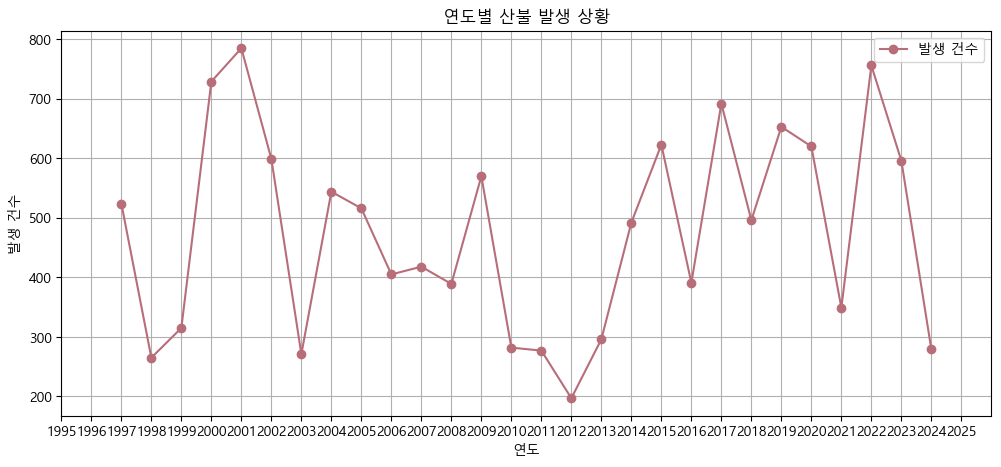

In [12]:
# ----------------------------------------
# 연도별 산불 발생 건수 시각화
# color = '#B76E79'
# ----------------------------------------
plt.plot(df1.index, df1["합계"], marker="o", color="#B76E79", label='발생 건수')
plt.legend()
plt.grid()
plt.title("연도별 산불 발생 상황")
plt.xlabel("연도")
plt.ylabel("발생 건수")
plt.xlim((1995, 2026))
plt.xticks(range(1995,2026, 1))
plt.show()

## 산불피해현황

### 연도별 산불 피해 면적

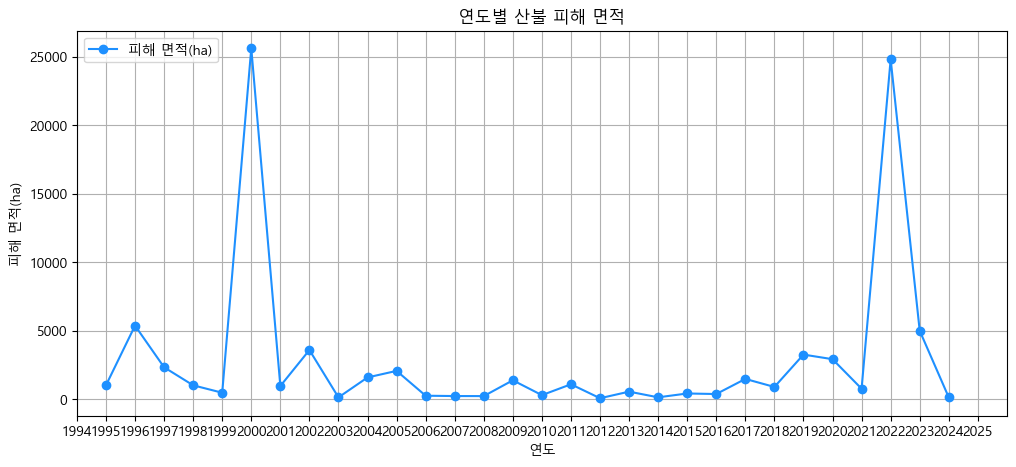

In [13]:
# ----------------------------------------
# 시각화 
# color='#1E90FF'
# ----------------------------------------
# display(df2.columns)

plt.plot(df2.index, df2[(    '산불피해',  '면적 (ha)')], marker='o', color='#1E90FF', label="피해 면적(ha)")
plt.legend()
plt.grid()
plt.title("연도별 산불 피해 면적")
plt.xlabel("연도")
plt.ylabel("피해 면적(ha)")
plt.xlim((1994, 2026))
plt.xticks(range(1994,2026, 1))
pass


In [14]:
# ----------------------------------------
# 당겨보기
# plt.ylim(0,10000000)
# ----------------------------------------

### 연도별 산불 피해 금액

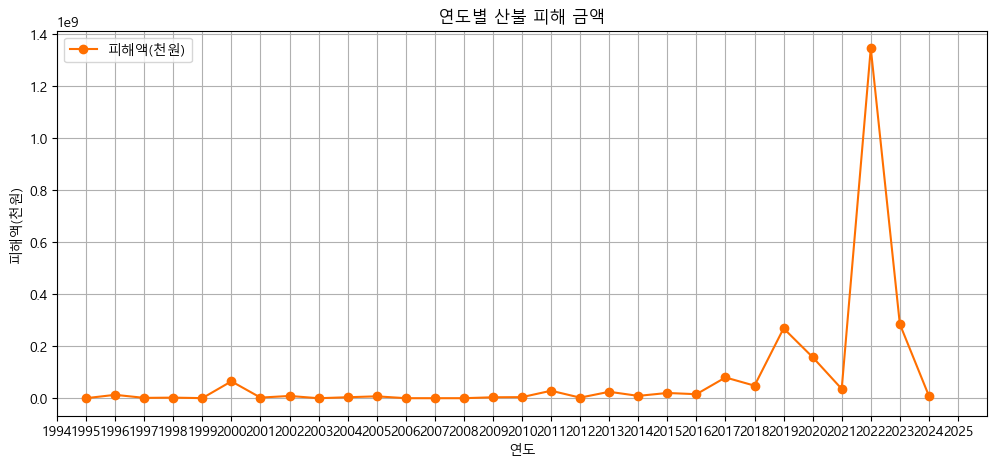

In [15]:
# ----------------------------------------
# 시각화
# color='#FF6F00'
# ----------------------------------------
df2.columns
plt.plot(df2.index, df2[(    '산불피해', '피해액 (천원)')], marker='o', color='#FF6F00', label="피해액(천원)")
plt.legend()
plt.grid()
plt.title("연도별 산불 피해 금액")
plt.xlabel("연도")
plt.ylabel("피해액(천원)")
plt.xlim((1994, 2026))
plt.xticks(range(1994,2026, 1))
pass


In [16]:
# ----------------------------------------
# 당겨보기
# plt.ylim(0,10000000)
# ----------------------------------------



### 연도별 인명 피해 현황

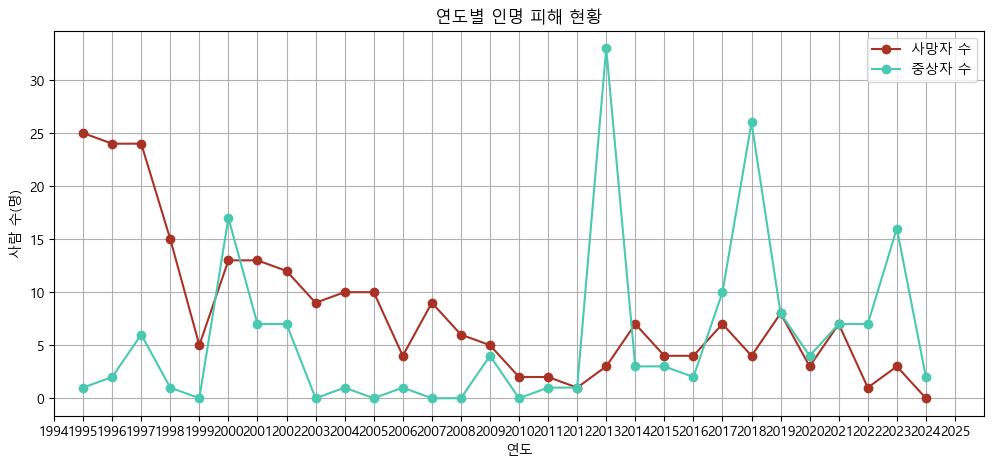

원인 (건)                                                         산불피해  \
             합계 입산자실화 규반소각 논밭두렁소각 쓰레기소각 담뱃불실화 성묘객실화 어린이불장난 건축물화재   기타 건수 (건)   
(시점, 시점)                                                                       
1995        630   312    0    138     0     0    34     18     0  128    630   
1996        527   248    0     73     0     0    38     30     0  138    527   
1997        524   247    0    103    41    29    33     10     0   61    524   
1998        265   104    0     65    24    13    16     11     0   32    265   
1999        315   156    0     57    13    21    20     10     0   38    315   
2000        729   312    0    134    68    63    47     18     0   87    729   
2001        785   354    0    143    47    88    45     24     0   84    785   
2002        599   217    0    110    58    60    63     20     0   71    599   
2003        271    93    0     55    24    43    31      4     0   21    271   
2004        544   250    0     83    47    51    22     13     0   78    544   
2005        516   232    0     95    41    60    24     13     0   51      0   
2006        405   185    0     63    40    26    12     14     0   65      0   
2007        418   193    0     92    21    37    23      7     0   45    418   
2008        389   148    0     62    44    49    26      6     0   54    389   
2009        570   222    0     94    67    34    36      6     0  111    570   
2010        282   138    0     38    34    13    15      1    14   29    282   
2011        277   110    0     66    39    12    11      3    11   25    277   
2012        197    87    0     18    13     8     7      3     7   54    197   
2013        296    91    0     77    41    22     9      4     5   47    296   
2014        492   198    0     98    68    26     9      2     9   82    492   
2015        623   193    0     99    86    22    19      5    13  186    623   
2016        391   107    0     79    80    14    18      1    13   79    391   
2017        692   254    0     94   110    24    22      2    36  150    692   
2018        496   158    0     67    58    12    26      1    41  133    496   
2019        653   179    0     69    89    22    20      2    59  213    653   
2020        620   217    0     49    65    75     9      1    54  150    620   
2021        349   133    0     22    27    34    16      3    20   94    349   
2022        756   253    0     44    59    53    14      0    51  282    756   
2023        596   170    0     56    73    56    23      1    41  176    596   
2024        279    49    0     24    28    36     6      1    14  121    279   

                                        인명피해 (명)          
           면적 (ha)   재적 (㎥)    피해액 (천원)       합계  사망  부상  
(시점, 시점)                                                  
1995       1013.27     5452      450678       26  25   1  
1996       5367.63   363471    13321974       26  24   2  
1997       2329.79    40815     1628712       30  24   6  
1998       1014.00    44092     2516219       16  15   1  
1999        472.79     6377      665661        5   5   0  
2000      25606.75  1373302    65241772       30  13  17  
2001        962.22    33753     2717181       20  13   7  
2002       3588.15   162819     8952928       19  12   7  
2003        132.84     2444      276583        9   9   0  
2004       1587.89    52787     4068651       11  10   1  
2005       2066.58   113830     7526217       10  10   0  
2006        254.23     7808      432755        5   4   1  
2007        230.40     6467      377296        9   9   0  
2008        226.90     4580      436054        6   6   0  
2009       1380.58    91626     3882701        9   5   4  
2010        296.84    11168     4450914        2   2   0  
2011       1089.53    52544    29062872        3   2   1  
2012         71.91     2467     2541534        2   1   1  
2013        551.78    66765    25019788       36   3  33  
2014        136.92     6962     9284595       10   7   3  
2015       

In [17]:
# ----------------------------------------
# 사망, 부상
# color='#A93226'
# color='#48C9B0'
# ----------------------------------------


plt.plot(df2.index, df2[('인명피해 (명)',       '사망')], marker='o', color='#A93226', label="사망자 수" )
plt.plot(df2.index, df2[('인명피해 (명)',       '부상')], marker='o', color='#48C9B0', label="중상자 수" )
plt.legend()
plt.grid()
plt.title("연도별 인명 피해 현황")
plt.xlabel("연도")
plt.ylabel("사람 수(명)")
plt.xlim((1994, 2026))
plt.xticks(range(1994,2026, 1))
plt.show()

df2





## 산불 원인

In [18]:
# ---------------------------------
# 산불 원인 컬럼만 가져와서 서브셋 생성
# ---------------------------------
cols = df2.columns[[1,3,4,5,6,7,8,9]].copy()

df_cause = df2.loc[:, cols]
df_cause.tail()


원인 (건)                                           
          입산자실화 논밭두렁소각 쓰레기소각 담뱃불실화 성묘객실화 어린이불장난 건축물화재   기타
(시점, 시점)                                                  
2020        217     49    65    75     9      1    54  150
2021        133     22    27    34    16      3    20   94
2022        253     44    59    53    14      0    51  282
2023        170     56    73    56    23      1    41  176
2024         49     24    28    36     6      1    14  121

In [19]:
# ---------------------------------
# 컬럼명 정리
# 중첩컬럼에서 1레벨 컬럼만 선택 : get_level_values(1)
# ---------------------------------
df_cause.columns = df_cause.columns.get_level_values(1)
df_cause


,입산자실화,논밭두렁소각,쓰레기소각,담뱃불실화,성묘객실화,어린이불장난,건축물화재,기타
"(시점, 시점)",,,,,,,,
1995,312,138,0,0,34,18,0,128
1996,248,73,0,0,38,30,0,138
1997,247,103,41,29,33,10,0,61
1998,104,65,24,13,16,11,0,32
1999,156,57,13,21,20,10,0,38
2000,312,134,68,63,47,18,0,87
2001,354,143,47,88,45,24,0,84
2002,217,110,58,60,63,20,0,71
2003,93,55,24,43,31,4,0,21


In [20]:
# ---------------------------------
# 컬럼별 평균 건수 
#   - 데이터프레임.mean()
#   - 내림차순 정렬
# ---------------------------------
cause_mean = df_cause.mean(axis = 0).sort_values(ascending=False)
cause_mean


입산자실화     187.000000
기타         96.166667
논밭두렁소각     75.566667
쓰레기소각      46.833333
담뱃불실화      33.433333
성묘객실화      23.133333
건축물화재      12.933333
어린이불장난      7.800000
dtype: float64

In [21]:
# ---------------------------------
# 원인별 컬러
# ---------------------------------

wildfire_colors = {
    '입산자실화':   '#A93226',  
    '기타':         '#E59866',  
    '논밭두렁소각': '#F7DC6F', 
    '쓰레기소각':   '#1B4F72', 
    '담뱃불실화':   '#52BE80',  
    '성묘객실화':   '#BA4A00', 
    '건축물화재':   '#5D6D7E', 
    '어린이불장난': '#A569BD'  
}

Index(['입산자실화', '기타', '논밭두렁소각', '쓰레기소각', '담뱃불실화', '성묘객실화', '건축물화재', '어린이불장난'], dtype='object')

['#A93226',
 '#E59866',
 '#F7DC6F',
 '#1B4F72',
 '#52BE80',
 '#BA4A00',
 '#5D6D7E',
 '#A569BD']

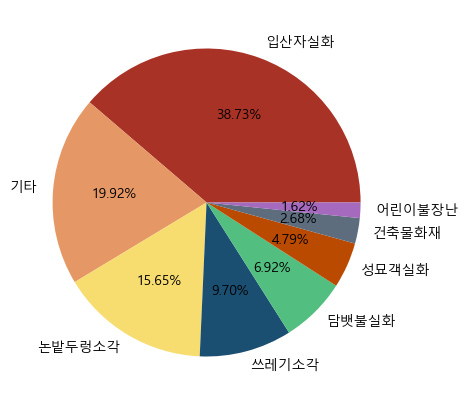

In [24]:
# ---------------------------------
# 시각화 (파이그래프)
# ---------------------------------
values = cause_mean.values
labels = cause_mean.index
display(labels)
colors = [wildfire_colors[label] for label in labels]
display(colors)
plt.pie(values, 
        labels=labels, 
        colors=colors,
        autopct='%.2f%%')
pass


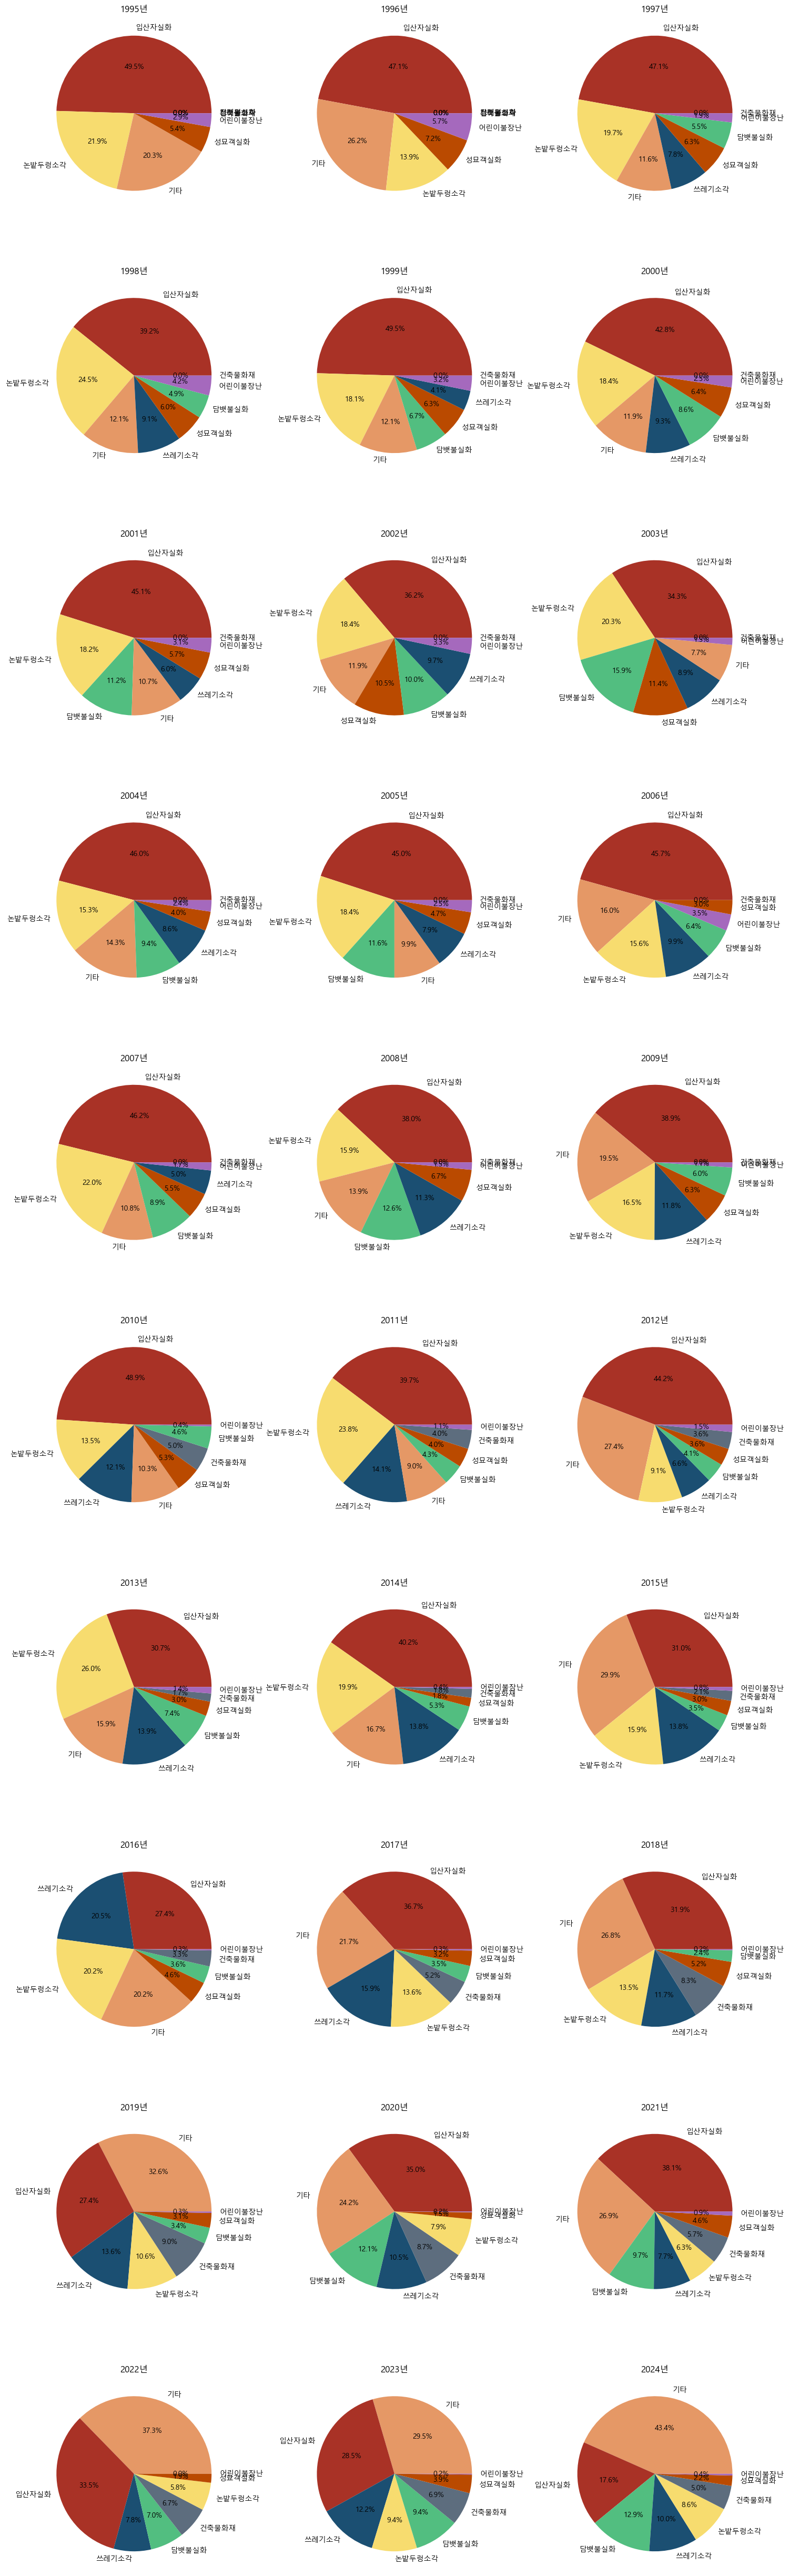

In [23]:
# ---------------------------------
# 연도별 시각화
# 서브플롯
#   - 10행 3열
# ---------------------------------
fig, axes = plt.subplots(10,3,figsize=(15,50))
flat_axes = axes.flatten() # 반복을 위해 flatten
# i = 0 # axex index

for i, year in enumerate(df_cause.index):
    data = df_cause.loc[year,:].sort_values(ascending=False)
    labels = data.index
    colors = [wildfire_colors[label] for label in labels]
    flat_axes[i].pie(data.values,
                     labels = labels,
                     autopct='%.1f%%',
                     colors=colors)    
    flat_axes[i].set_title(f'{year}년')


plt.tight_layout()

# 데이터 분석 

1. 주요 원인의 장기 추세
입산자 실화

전체 기간 동안 가장 높은 비중을 차지하며, 40~50% 사이에서 지속.

특히 1990년대 후반~2000년대 중반에는 절반 가까이 차지.

최근(2020년대)에도 여전히 1위 원인으로, 산불 예방 정책의 핵심 타깃.

논·밭두렁 소각

1990년대 후반~2000년대 초반에는 20% 이상 비중.

2010년대 후반부터 점차 감소 추세 → 소각 금지 캠페인과 단속 효과로 보임.

쓰레기 소각

전체적으로 10~15% 내외 유지.

특정 연도(2016, 2017 등)에는 20% 안팎까지 상승.

2. 기타 주목할 변화
건축물 화재, 담뱃불 실화

개별 비중은 작지만, 합산하면 꾸준히 10% 내외 차지.

특히 담뱃불 실화는 인위적 부주의로, 계도·단속 강화 필요.

어린이 불장난, 성묘객 실화

비중은 매우 낮지만, 방심하면 대형 피해로 이어질 수 있는 잠재 위험.

특정 명절·계절에 집중적으로 발생하는 가능성 높음.

기타 원인

일부 연도에서 25~30% 수준까지 높아짐 → 미분류나 복합 원인일 가능성.

데이터 관리·분류 체계 개선 필요.

3. 시사점
입산자 실화:

계절별 등산객 많은 시기(봄철, 가을철) 집중 홍보 및 감시.

산불 조심 기간 동안 산행 통제·불씨 점검 강화.

논·밭두렁·쓰레기 소각:

농번기 전후로 드론 순찰, 불법 소각 신고 포상제 확대.

마을 단위 대체 제초·폐기물 처리 지원.

장기 모니터링 필요 원인:

건축물 화재, 담뱃불 실화, 기타 원인 → 도시·농촌 경계지역 중심 관리.